In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
titanic=pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic=titanic[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Survived']]

In [6]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
titanic.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

In [8]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [9]:
a=titanic.dtypes[titanic.dtypes=='object'].index
titanic[a].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mannion, Miss. Margareth",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [11]:
titanic['Cabin_null']=np.where(titanic.Cabin.isnull(),1,0)

In [12]:
titanic=titanic.drop(['Cabin'],axis=1)

In [13]:
from sklearn.impute import KNNImputer
impute=KNNImputer(n_neighbors=10,weights='distance')
impute.fit(titanic[['Age']])
titanic.Age=impute.transform(titanic[['Age']])

In [14]:
titanic.Embarked=titanic.Embarked.fillna(titanic.Embarked.mode()[0])

In [15]:
titanic.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
Cabin_null     0
dtype: int64

In [16]:
titanic=titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Survived']]
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


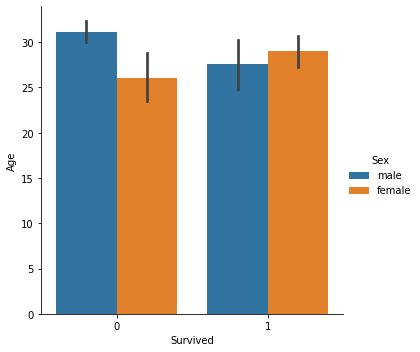

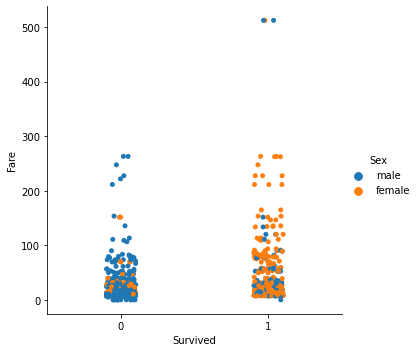

In [19]:

sns.catplot(y='Age',x='Survived',data=titanic,kind='bar',hue='Sex',ax=ax[0])
sns.catplot(y='Fare',x='Survived',data=titanic,hue='Sex',ax=ax[1])

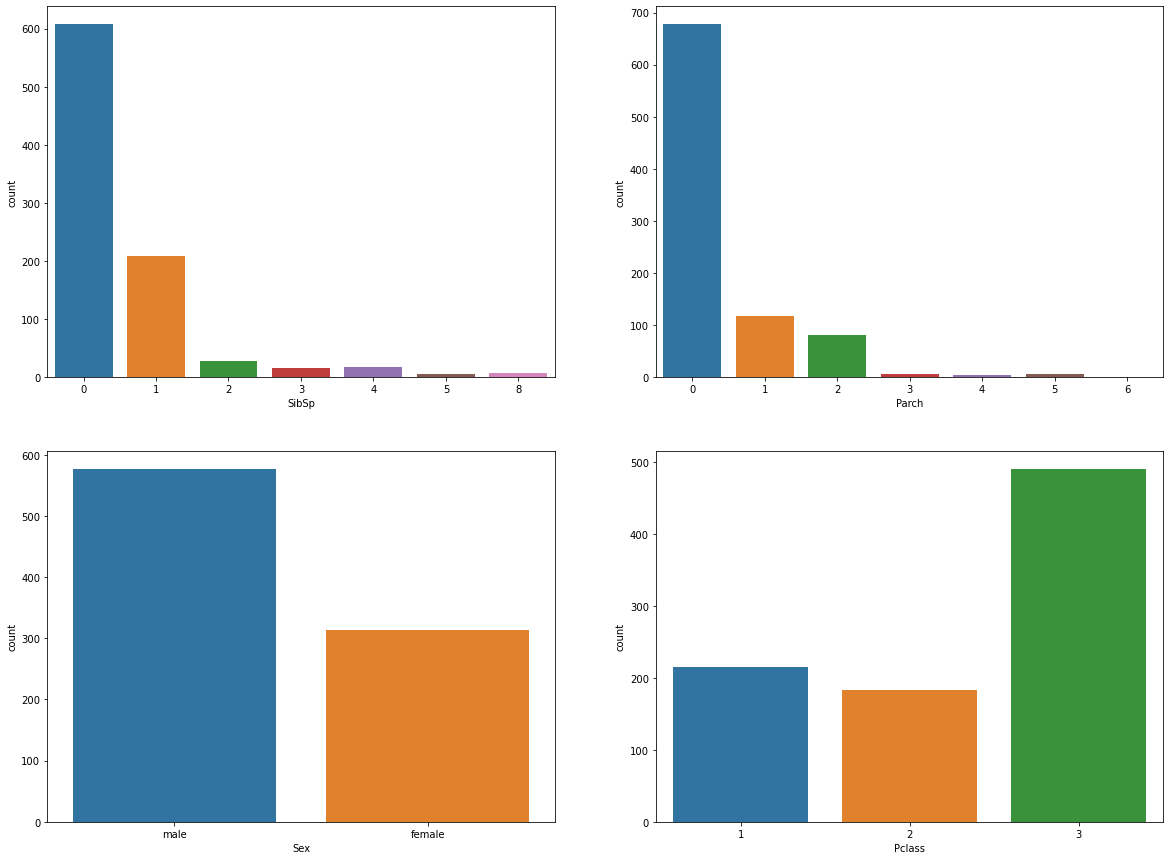

In [20]:
fig,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(titanic.SibSp,ax=ax[0,0])
sns.countplot(titanic.Parch,ax=ax[0,1])
sns.countplot(titanic.Sex,ax=ax[1,0])
sns.countplot(titanic.Pclass,ax=ax[1,1])

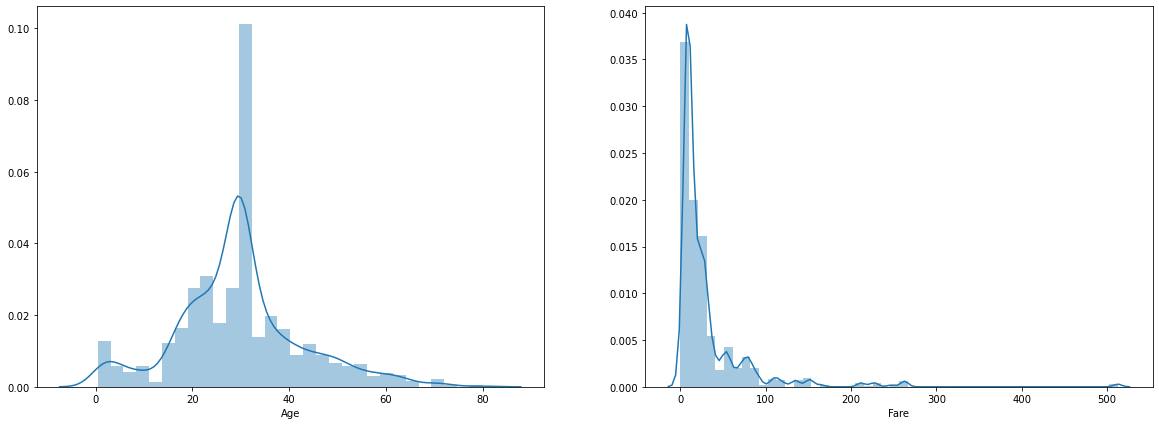

In [21]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.distplot(titanic.Age,ax=ax[0])
sns.distplot(titanic.Fare,ax=ax[1])

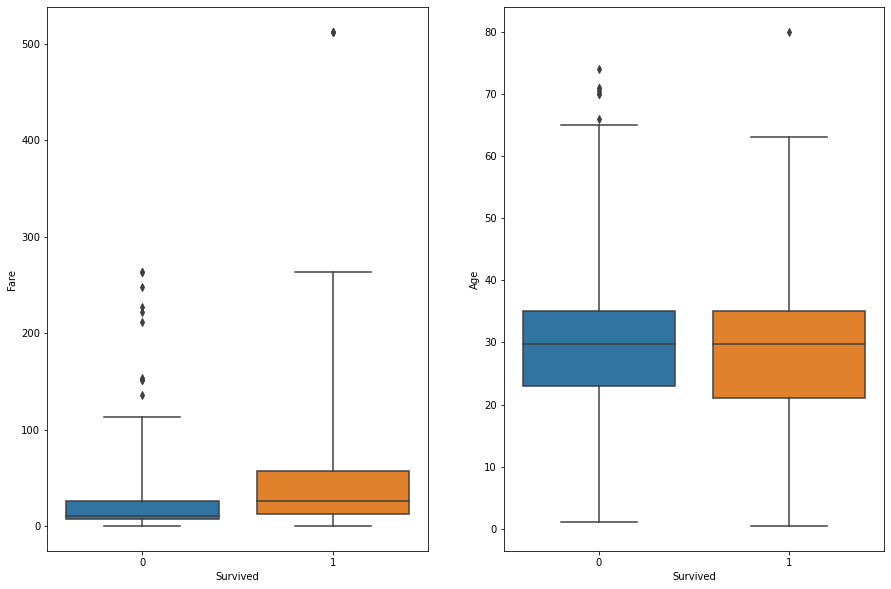

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
sns.boxplot(x=titanic.Survived,y=titanic.Fare,ax=ax[0],whis=5)
sns.boxplot(x=titanic.Survived,y=titanic.Age,ax=ax[1],whis=2.5)

In [23]:
titanic.Sex=pd.get_dummies(data=titanic[['Sex']],drop_first=True)

In [24]:
Pclass_map=titanic.Pclass.value_counts().to_dict()

In [25]:
titanic.Pclass=titanic.Pclass.map(Pclass_map)

In [26]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,491,1,22.0,1,0,7.2500,0
1,216,0,38.0,1,0,71.2833,1
2,491,0,26.0,0,0,7.9250,1
3,216,0,35.0,1,0,53.1000,1
4,491,1,35.0,0,0,8.0500,0


In [27]:
q3=titanic.Fare.quantile(0.75)
q1=titanic.Fare.quantile(0.25)
IQR=q3-q1
titanic.Fare=np.where(titanic.Fare >(IQR + 6*q3),titanic.Fare.mean(),titanic.Fare)

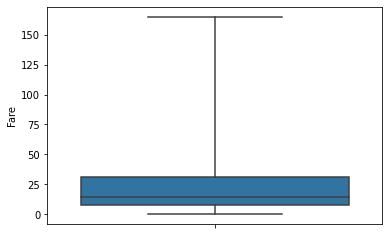

In [28]:
sns.boxplot(y=titanic.Fare,whis=6)

In [29]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [30]:
X=titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y=titanic[['Survived']]

In [31]:
y.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [33]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(623, 6) (268, 6)
(623, 1) (268, 1)


In [53]:
from sklearn.tree import plot_tree , export_graphviz , DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV , StratifiedKFold ,RandomizedSearchCV ,cross_val_score
dtree=DecisionTreeClassifier()
cv=StratifiedKFold(n_splits=10)
score=cross_val_score(dtree,X,y,cv=cv,n_jobs=-1)
score.mean()

0.7867665418227217

In [54]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
dtree.score(X_test,y_test)

0.7238805970149254

In [55]:
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report
accuracy_score(y_test,y_pred)

0.7238805970149254

In [56]:
dtree.score(X_train,y_train)

0.9887640449438202

In [57]:
confusion_matrix(y_test,y_pred)

array([[125,  28],
       [ 46,  69]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       153
           1       0.71      0.60      0.65       115

    accuracy                           0.72       268
   macro avg       0.72      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268



[Text(750.8494387135922, 1587.8842105263157, 'X[1] <= 0.5\ngini = 0.463\nsamples = 623\nvalue = [396, 227]'),
 Text(309.30400485436894, 1502.0526315789473, 'X[0] <= 353.5\ngini = 0.387\nsamples = 217\nvalue = [57, 160]'),
 Text(65.00970873786407, 1416.221052631579, 'X[2] <= 2.5\ngini = 0.097\nsamples = 117\nvalue = [6, 111]'),
 Text(32.50485436893204, 1330.3894736842105, 'X[4] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(16.25242718446602, 1244.5578947368422, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(48.75728155339806, 1244.5578947368422, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(97.51456310679612, 1330.3894736842105, 'X[5] <= 28.856\ngini = 0.083\nsamples = 115\nvalue = [5, 110]'),
 Text(81.26213592233009, 1244.5578947368422, 'X[5] <= 28.231\ngini = 0.206\nsamples = 43\nvalue = [5, 38]'),
 Text(65.00970873786407, 1158.7263157894736, 'X[2] <= 21.5\ngini = 0.172\nsamples = 42\nvalue = [4, 38]'),
 Text(48.75728155339806, 1072.8947368421054, 'gini = 0.0\nsample

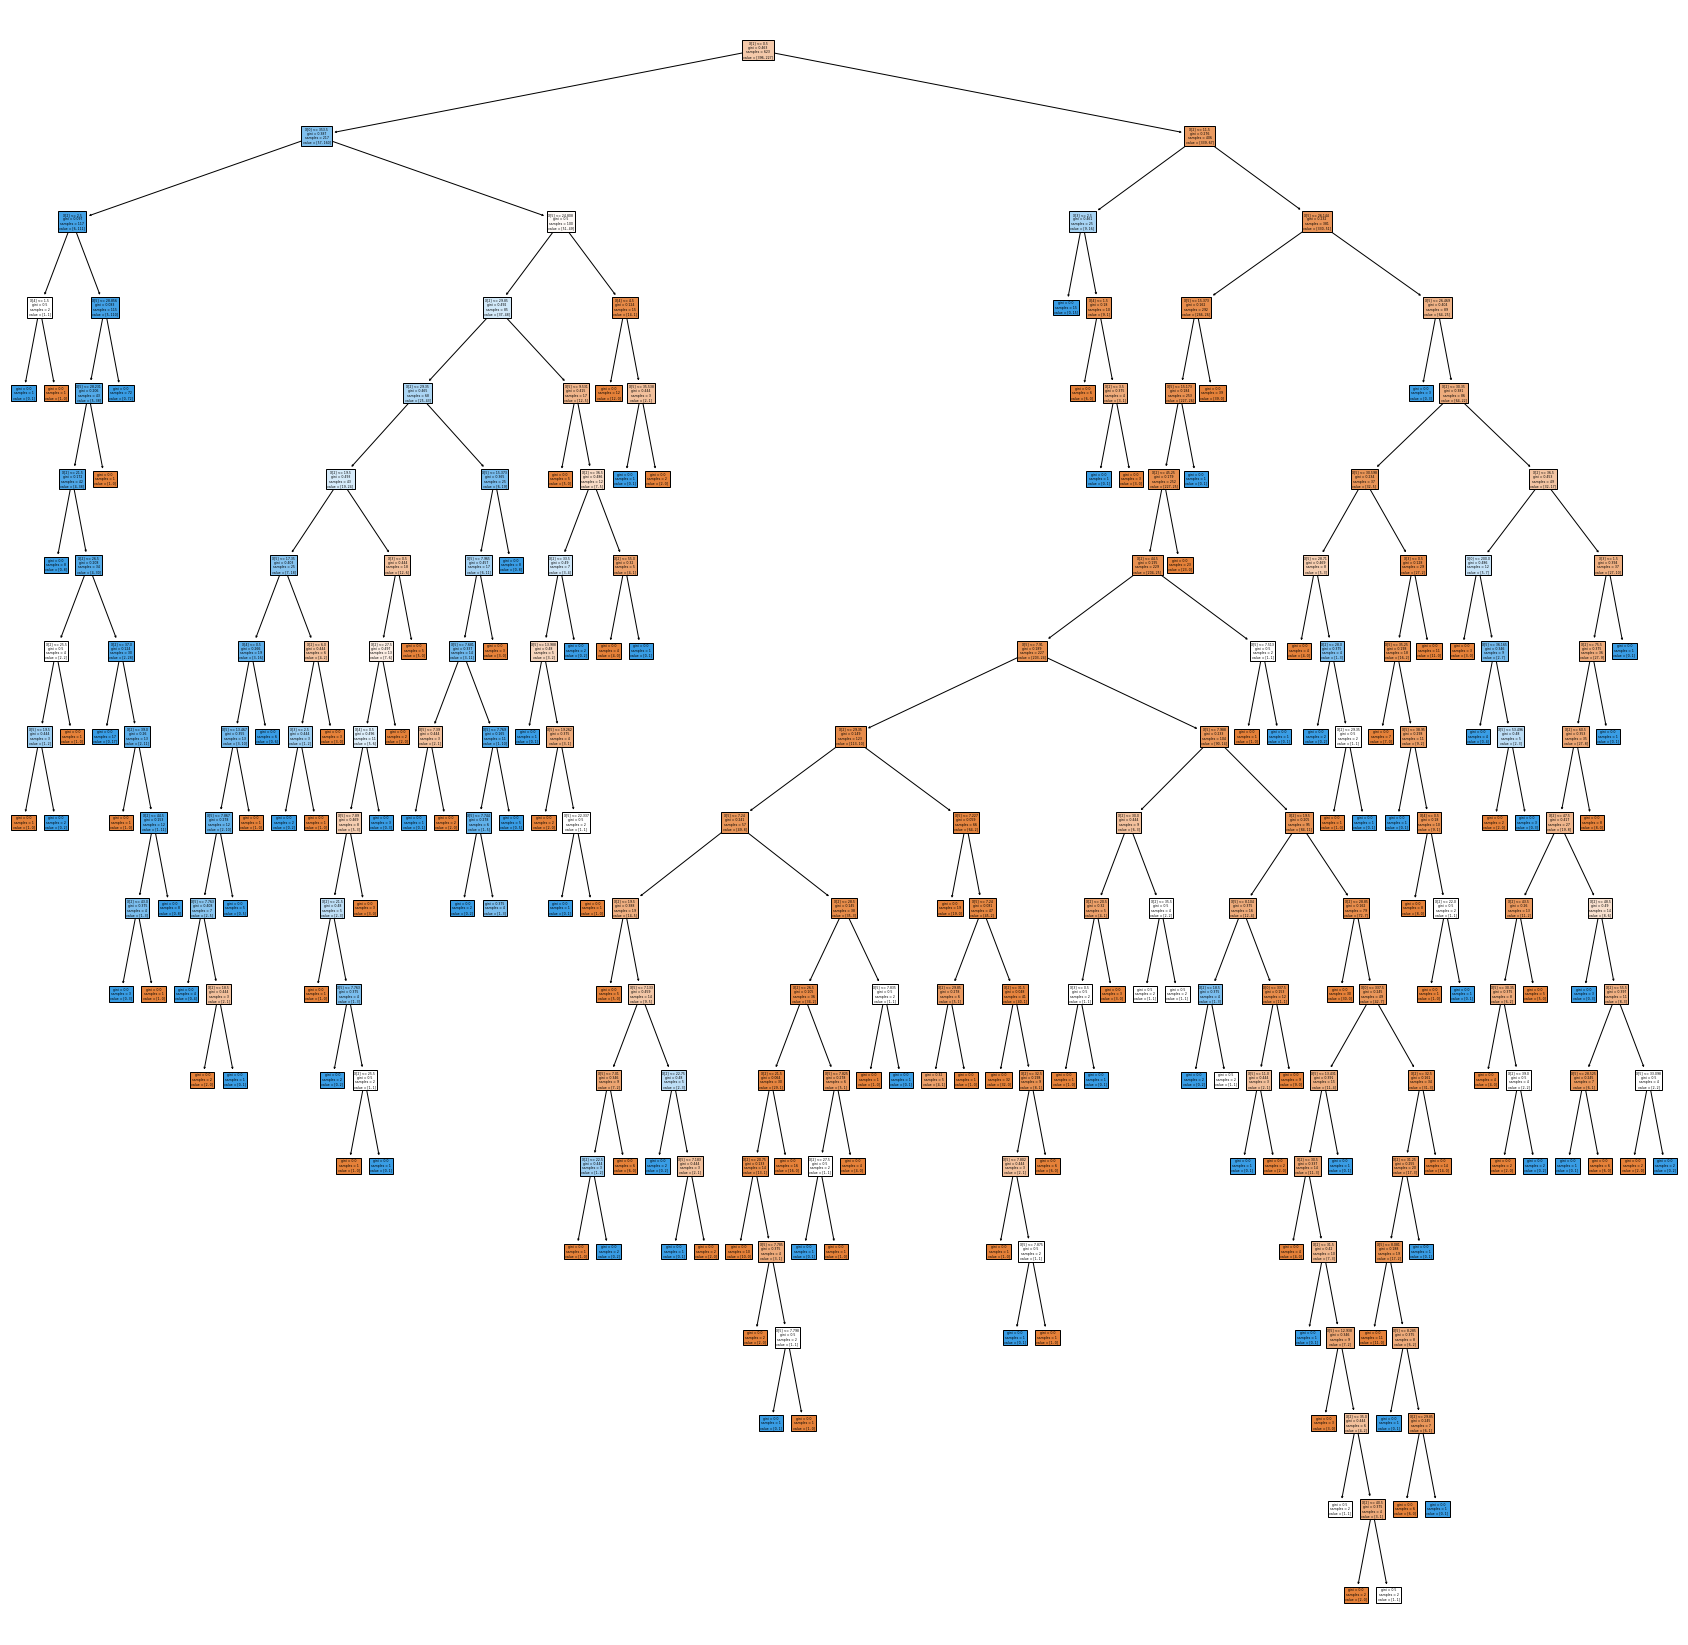

In [61]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(dtree,filled=True,)

In [94]:
dtree1=DecisionTreeClassifier()
grid_param={ 'criterion':['gini','entropy'],
            'max_depth':range(2,32,1),
            'splitter':['best','random'],
           'min_samples_split':range(5,13,1),
            'min_samples_leaf':[3,4,5,6],
           }
cv=StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(dtree1,param_grid=grid_param,cv=cv,n_jobs=-1)

grid_search.fit(X_train,y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': range(5, 13),
                         'splitter': ['best', 'random']})

In [95]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5)

In [96]:
grid_search.best_score_

0.8364311315924219

In [97]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'best'}

In [100]:
dtree_final=DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5)
cv=StratifiedKFold(n_splits=10)
score=cross_val_score(dtree_final,X,y,cv=cv,n_jobs=-1)
score.mean()

0.8204244694132334

In [101]:
dtree_final=DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=5)
dtree_final.fit(X_train,y_train)
y_pred=dtree_final.predict(X_test)
dtree_final.score(X_test,y_test)

0.7873134328358209

[Text(418.5, 713.475, 'X[1] <= 0.5\ngini = 0.463\nsamples = 623\nvalue = [396, 227]'),
 Text(209.25, 509.625, 'X[0] <= 353.5\ngini = 0.387\nsamples = 217\nvalue = [57, 160]'),
 Text(104.625, 305.775, 'X[5] <= 28.856\ngini = 0.097\nsamples = 117\nvalue = [6, 111]'),
 Text(52.3125, 101.92499999999995, 'gini = 0.201\nsamples = 44\nvalue = [5, 39]'),
 Text(156.9375, 101.92499999999995, 'gini = 0.027\nsamples = 73\nvalue = [1, 72]'),
 Text(313.875, 305.775, 'X[5] <= 24.808\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(261.5625, 101.92499999999995, 'gini = 0.492\nsamples = 85\nvalue = [37, 48]'),
 Text(366.1875, 101.92499999999995, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(627.75, 509.625, 'X[2] <= 11.5\ngini = 0.276\nsamples = 406\nvalue = [339, 67]'),
 Text(523.125, 305.775, 'X[3] <= 2.5\ngini = 0.461\nsamples = 25\nvalue = [9, 16]'),
 Text(470.8125, 101.92499999999995, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(575.4375, 101.92499999999995, 'gini = 0.18\nsampl

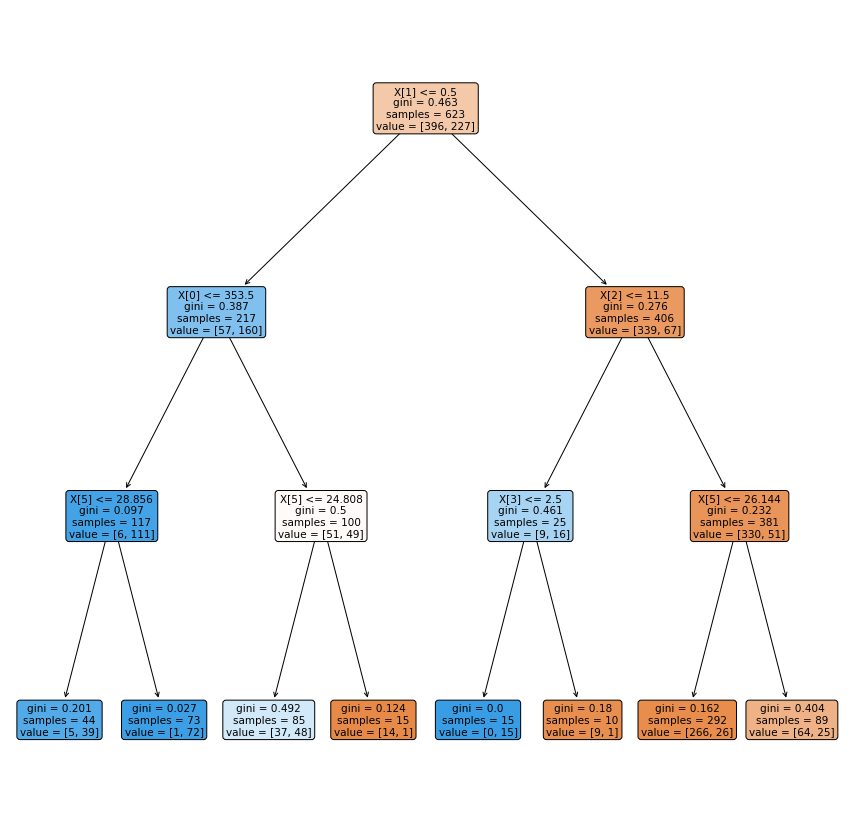

In [112]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dtree_final,filled=True,rounded=True)

In [113]:
import pickle
filename='DecisionTreeClassifier.pickle'
pickle.dump(dtree_final,open(filename,'wb'))

In [114]:
model=pickle.load(open(filename,'rb'))
y_pred=model.predict(X_test)

In [115]:
accuracy_score(y_test,y_pred)

0.7873134328358209

In [119]:
model.score(X_train,y_train)

0.8459069020866774

In [122]:
from sklearn import tree
path=dtree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

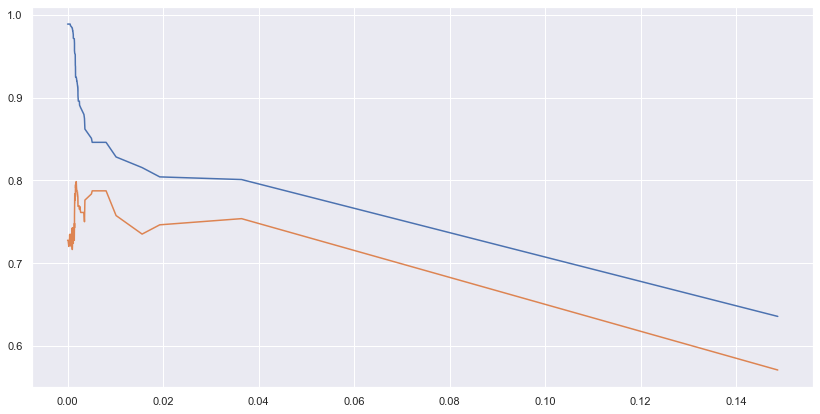

In [126]:
accuracy_train=[]
accuracy_test=[]
for i in ccp_alphas :
    tree=DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=ccp_alphas)
sns.lineplot(y=accuracy_test,x=ccp_alphas)